# This script conatins the following:
## 1.Import libraries
## 2.Import Key Events 20th Century Text file
## 3.Tokenisation
## 4.Remove stopwords
## 5.Create a Tags List using TextBlob
## 6.List of Top 10 POS tags
## 7.Bar Charts for Top 15 POS labels
## 8.Create Dataframe of countries and counts


### 1.Import Libraries

In [9]:
# Import libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import os

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ianfleming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ianfleming/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ianfleming/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# Create path
path = r'/Users/ianfleming/20th-century'

### 2.Import key events 20th century txt file

In [12]:
# Import txt file
with open("/Users/ianfleming/20th-century/key_events_20th_century.txt", "r", encoding="utf-8") as file:
    text = file.read()



In [13]:
# Check import
print(text[:500])

The
20th century
changed the world in unprecedented ways. The
World Wars
sparked tension between countries and led to the creation of
atomic bombs
, the
Cold War
led to the
Space Race
and the creation of space-based rockets, and the
World Wide Web
was created. These advancements have played a significant role in citizens' lives and shaped the
21st century
into what it is today.
Historic events in the 20th century
World at the beginning of the century
Main article:
Edwardian era
The new beginning


### 3. Tokenisation

In [14]:
# Clean .txt file
text = text.replace('\n', ' ').strip().lower()

In [15]:
# keep only letters and spaces
text = re.sub(r'[^a-z\s]', '', text)

In [17]:
# Squeeza extra spaces
text = re.sub(r'\s{2,}', ' ',text) 

In [19]:
# Tokenise
tokens = word_tokenize(text)

In [20]:
# Frequency distribution
fdist = FreqDist(tokens)
top10 = fdist.most_common(10)

In [21]:
# Convert to DataFrame 
df_top10 = pd.DataFrame(top10, columns=['Word', 'Count'])

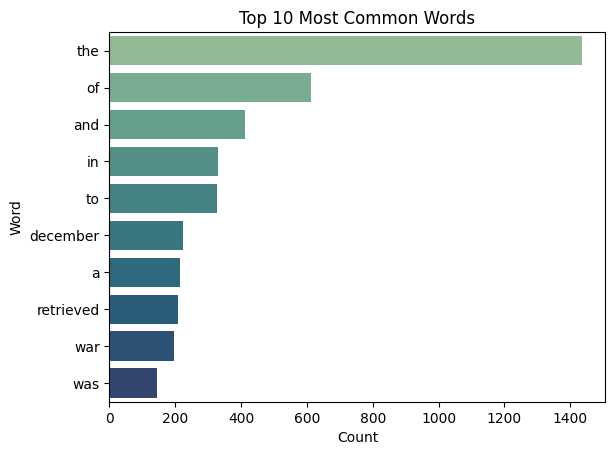

In [22]:
# Plot
sns.barplot(x='Count', y='Word', data=df_top10, palette='crest')
plt.title('Top 10 Most Common Words')
plt.show()

### 4. Remove Stopwords and re-plot

In [23]:
stop_words = set(stopwords.words('english'))
tokens_clean = [w for w in tokens if w.isalpha() and w not in stop_words]

In [35]:
fdist_clean = FreqDist(tokens_clean)
df_top10_clean = pd.DataFrame(fdist_clean.most_common(10), columns=['Word', 'Count'])

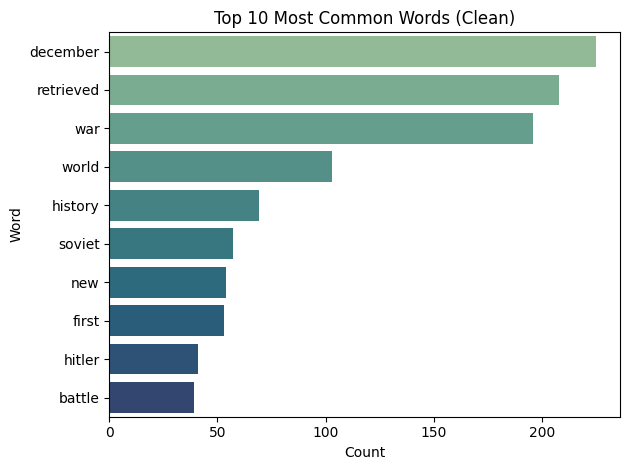

In [36]:
# re-plot
clean_top10 = sns.barplot(data=df_top10_clean, x='Count', y='Word', palette='crest')
plt.title('Top 10 Most Common Words (Clean)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [37]:
# Export plot
clean_top10.figure.savefig(os.path.join(path,'top_10_words_clean.png'))

In [38]:
# export dataframe
df_top10_clean.to_csv(r'/Users/ianfleming/20th-century/top10_words_clean.csv', index=False)
print("CSV saved successfully to /Users/ianfleming/20th-century/")

CSV saved successfully to /Users/ianfleming/20th-century/


"ISBN" appears frequently because of wiki's citations so I will remove them and re-plot

In [33]:
# remove isbn
irrelevant_words = ['isbn']

In [34]:
# tokenise
tokens_clean = [w for w in tokens_clean if w not in irrelevant_words]


In [39]:
print(df_top10_clean.head())

        Word  Count
0   december    225
1  retrieved    208
2        war    196
3      world    103
4    history     69


Text(0, 0.5, 'Word')

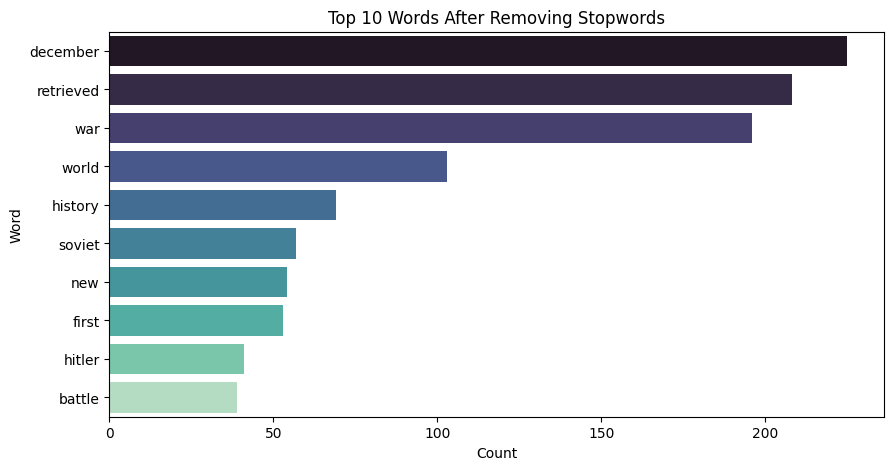

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=df_top10_clean, palette='mako', ax=ax)
ax.set_title('Top 10 Words After Removing Stopwords')
ax.set_xlabel('Count')
ax.set_ylabel('Word')

In [41]:
fig.tight_layout()
fig.savefig(r'/Users/ianfleming/20th-century/top10_words_clean.png',
            dpi=300, bbox_inches='tight')

In [42]:
plt.show() 

In [43]:
plt.close(fig)

In [44]:
print('Saved to /Users/ianfleming/20th-century/top10_words_clean.png')

Saved to /Users/ianfleming/20th-century/top10_words_clean.png


Previously, most common words were "and", "of", "in", "the", "to" and punctutation but once stopwords were removed and it was re-ploted, then the true content was unveiled. Words such as "war", "Hitler", "December" and "retrieve" appear. This is the real subject matter that is useful.

### 5. Create a Tags list using TextBlob

In [45]:
clean_text = " ".join(tokens_clean)

In [46]:
# Create TextBlob and extract (word, POS) tags
blob = TextBlob(clean_text)

In [47]:
tags = blob.tags

In [48]:
len(tags), tags[:10]

(9767,
 [('th', 'JJ'),
  ('century', 'NN'),
  ('changed', 'VBD'),
  ('world', 'NN'),
  ('unprecedented', 'JJ'),
  ('ways', 'NNS'),
  ('world', 'NN'),
  ('wars', 'NNS'),
  ('sparked', 'VBD'),
  ('tension', 'NN')])

In [49]:
# Create a dataframe for POS
pos_df = pd.DataFrame(tags, columns=["Word", "POS"])


In [50]:
pos_df.head(10)

,Word,POS
0,th,JJ
1,century,NN
2,changed,VBD
3,world,NN
4,unprecedented,JJ
5,ways,NNS
6,world,NN
7,wars,NNS
8,sparked,VBD
9,tension,NN


In [51]:
# export dataframe
pos_df.to_csv(r'/Users/ianfleming/20th-century/pos_dataframe.csv', index=False)
print("CSV saved successfully to /Users/ianfleming/20th-century/")

CSV saved successfully to /Users/ianfleming/20th-century/


### 6. List of top 10 POS Tags

In [52]:
# Count POS top 10 frequencies
top_pos = (pos_df["POS"]
           .value_counts()
           .head(10)
           .reset_index())
top_pos.columns = ["POS", "Count"]
top_pos

,POS,Count
0,NN,3645
1,JJ,2251
2,NNS,1082
3,VBD,734
4,RB,434
5,VBP,371
6,VBG,271
7,VBN,245
8,IN,160
9,VB,116


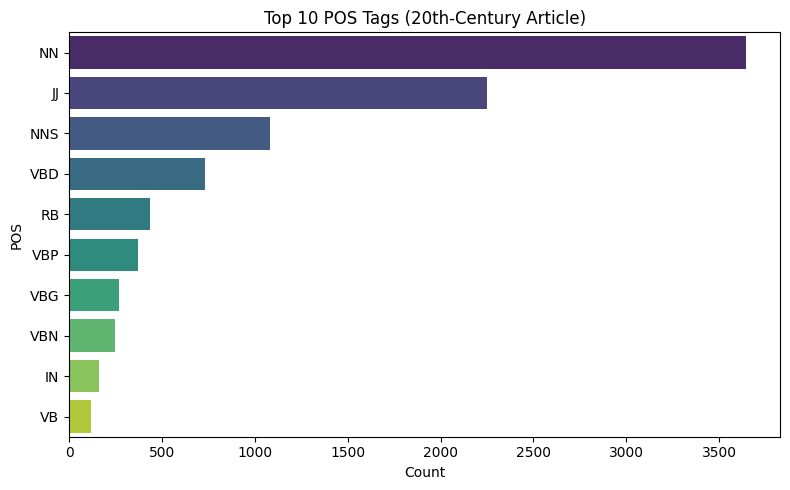

In [53]:
# Plot and save chart
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=top_pos, x="Count", y="POS", palette="viridis", ax=ax)
ax.set_title("Top 10 POS Tags (20th-Century Article)")
ax.set_xlabel("Count"); ax.set_ylabel("POS")
fig.tight_layout()

fig.savefig(r'/Users/ianfleming/20th-century/top_pos_tags.png', dpi=300, bbox_inches='tight')
plt.show(); plt.close(fig)

In [54]:
# Export the csv file
top_pos.to_csv(r'/Users/ianfleming/20th-century/top_pos_tags.csv', index=False)

### 7. Bar charts with Top 15 POS labels

In [55]:
def top_words_by_pos(pos_prefix: str, k: int = 15):
    sub = pos_df[pos_df["POS"].str.startswith(pos_prefix)]
    words = sub["Word"].str.lower().str.strip()
    counts = (words[words.str.isalpha()]
              .value_counts()
              .head(k)
              .reset_index())
    counts.columns = ["Word", "Count"]
    return counts

In [56]:
# Nouns
top15_nouns = top_words_by_pos("NN", 15)
top15_nouns.head()

,Word,Count
0,war,196
1,world,103
2,december,85
3,history,69
4,hitler,39


In [57]:
# Verbs
top15_verbs = top_words_by_pos("VB", 15)
top15_verbs.head()

,Word,Count
0,retrieved,195
1,became,29
2,archived,16
3,led,15
4,made,14


In [58]:
# Adjectives
top15_adjs  = top_words_by_pos("JJ", 15)
top15_adjs.head()

,Word,Count
0,december,128
1,soviet,57
2,new,54
3,nuclear,37
4,german,31


In [59]:
# Plot and save
def plot_show_and_save(df, title, filename, path, y_col="Word"):
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.barplot(data=df, x="Count", y=y_col, palette="mako", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Count")
    ax.set_ylabel(y_col)
    fig.tight_layout()

    full_path = os.path.join(path, filename)
    fig.savefig(full_path, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print("Chart saved:", full_path)



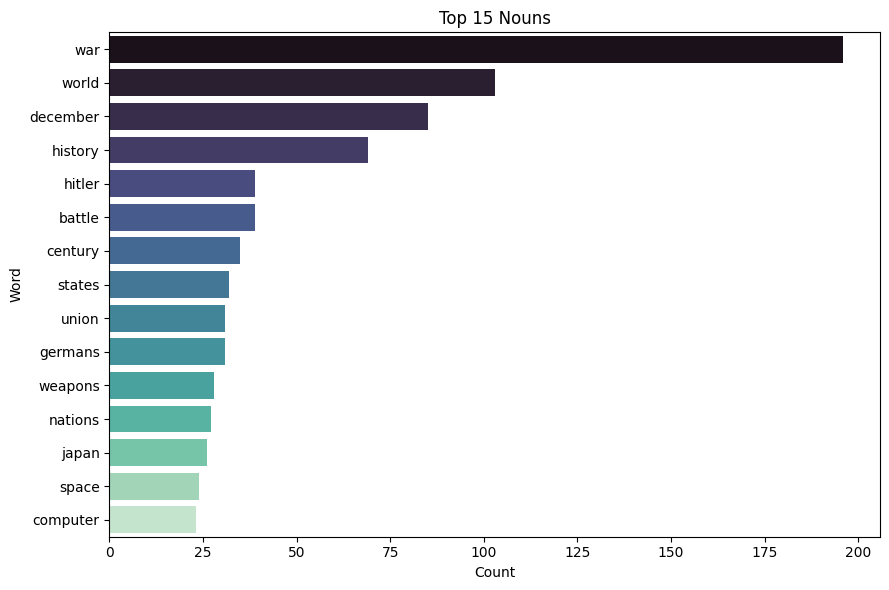

Chart saved: /Users/ianfleming/20th-century/top15_nouns.png


In [60]:
# Calling noun chart
plot_show_and_save(top15_nouns, "Top 15 Nouns", "top15_nouns.png", path)

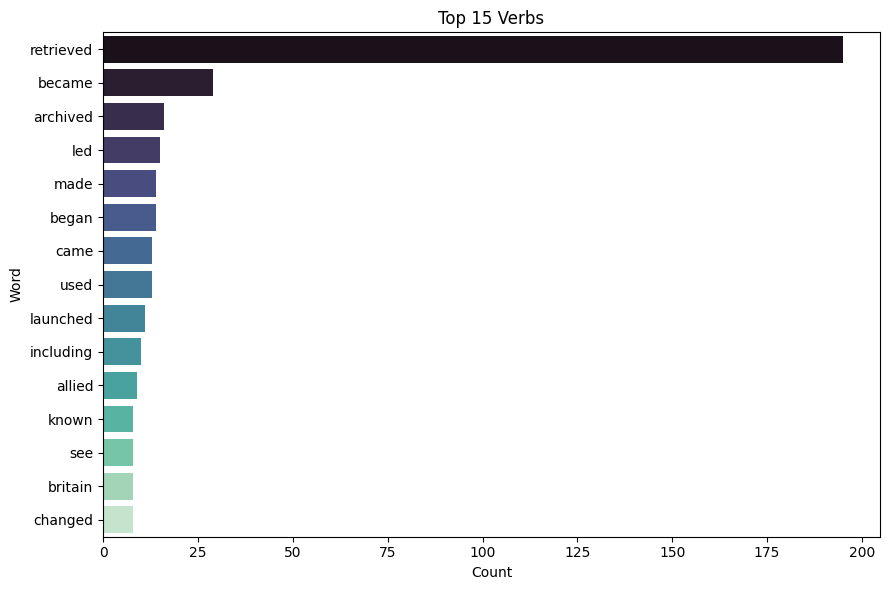

Chart saved: /Users/ianfleming/20th-century/top15_verbs.png


In [61]:
# Calling verb chart
plot_show_and_save(top15_verbs, "Top 15 Verbs", "top15_verbs.png", path)

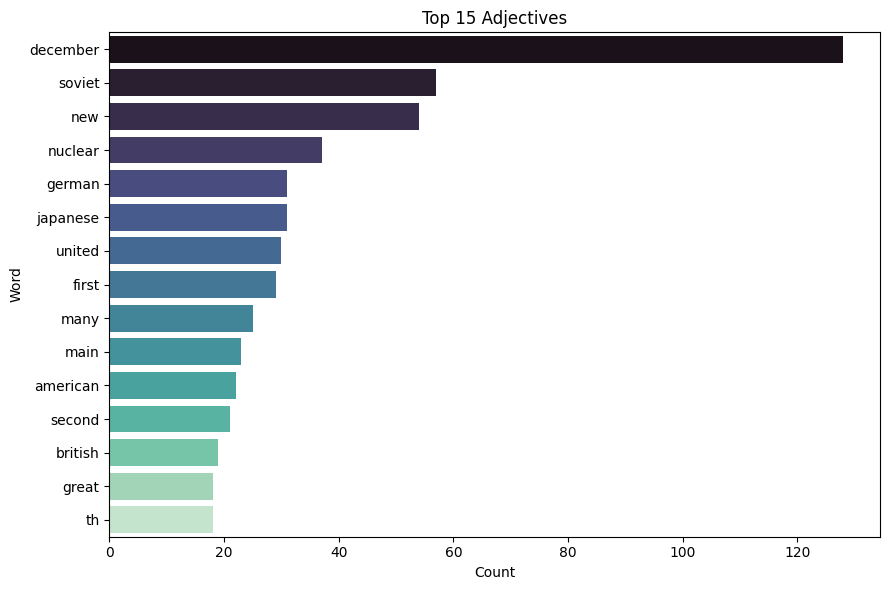

Chart saved: /Users/ianfleming/20th-century/top15_adjectives.png


In [62]:
# Calling adjective chart
plot_show_and_save(top15_adjs,  "Top 15 Adjectives", "top15_adjectives.png", path)

#### Chart Interpretation
The charts reveals that the 20th-century text is heavily shaped by war, politics, and international relations. Nouns like war, world, and Hitler dominate, pointing to major historical conflicts. Common verbs such as retrieved and led suggest a factual, documentary tone. The adjectives such as soviet, nuclear, and american highlight geopolitical and technological themes.

### 8. Create a dataframe of countries and counts

In [63]:
# Import data
countries = pd.read_csv(os.path.join(path,'countries_list_20th_century_1.5.csv'),index_col=0)


In [64]:
# Check import
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [65]:
# Check countries
countries['country_name'].to_list()


[' Afghanistan ',
 '  Albania ',
 '  Algeria ',
 '  Andorra ',
 '  Angola ',
 '  Antigua and Barbuda ',
 '  Argentina ',
 '  Armenia ',
 '  Australia ',
 '  Austria ',
 '  Azerbaijan',
 ' Bahamas, The ',
 '  Bahrain ',
 '  Bangladesh ',
 '  Barbados ',
 '  Belarus ',
 '  Belgium ',
 '  Belize ',
 '  Benin ',
 '  Bhutan ',
 '  Bolivia ',
 '  Bosnia and Herzegovina ',
 '  Botswana ',
 '  Brazil ',
 '  Brunei ',
 '  Bulgaria ',
 '  Burkina Faso ',
 '  Burundi',
 ' Cambodia ',
 '  Cameroon ',
 '  Canada ',
 '  Cape Verde ',
 '  Central African Republic ',
 '  Chad ',
 '  Chile ',
 "  China, People's Republic of ",
 '  Colombia ',
 '  Comoros ',
 '  Congo, Democratic Republic of the ',
 '  Congo, Republic of the ',
 '  Costa Rica ',
 '  Croatia ',
 '  Cuba ',
 '  Cyprus ',
 '  Czech Republic',
 '  Denmark ',
 '   Djibouti ',
 '   Dominica ',
 '   Dominican Republic',
 '  East Timor ',
 '   Ecuador ',
 '   Egypt ',
 '   El Salvador ',
 '   Equatorial Guinea ',
 '   Eritrea ',
 '   Estonia ',

In [39]:
# Show unique values
for i, name in enumerate(countries['country_name'].unique(), start=1):
    print(f"{i}. {name}")


1.  Afghanistan 
2.   Albania 
3.   Algeria 
4.   Andorra 
5.   Angola 
6.   Antigua and Barbuda 
7.   Argentina 
8.   Armenia 
9.   Australia 
10.   Austria 
11.   Azerbaijan
12.  Bahamas, The 
13.   Bahrain 
14.   Bangladesh 
15.   Barbados 
16.   Belarus 
17.   Belgium 
18.   Belize 
19.   Benin 
20.   Bhutan 
21.   Bolivia 
22.   Bosnia and Herzegovina 
23.   Botswana 
24.   Brazil 
25.   Brunei 
26.   Bulgaria 
27.   Burkina Faso 
28.   Burundi
29.  Cambodia 
30.   Cameroon 
31.   Canada 
32.   Cape Verde 
33.   Central African Republic 
34.   Chad 
35.   Chile 
36.   China, People's Republic of 
37.   Colombia 
38.   Comoros 
39.   Congo, Democratic Republic of the 
40.   Congo, Republic of the 
41.   Costa Rica 
42.   Croatia 
43.   Cuba 
44.   Cyprus 
45.   Czech Republic
46.   Denmark 
47.    Djibouti 
48.    Dominica 
49.    Dominican Republic
50.   East Timor 
51.    Ecuador 
52.    Egypt 
53.    El Salvador 
54.    Equatorial Guinea 
55.    Eritrea 
56.    Estonia 
57.    E

In [66]:

def normalize_country_name(name: str) -> str:
    name = str(name).strip().lower()
    # Move trailing ", the" to the front
    name = re.sub(r'^(.*),\s*the$', r'the \1', name)
    # Simplify known long forms
    replacements = {
        "china, people's republic of": "china",
        "korea, republic of": "south korea",
        "korea, democratic people's republic of": "north korea",
        "gambia, the": "the gambia",
        "congo, democratic republic of the": "democratic republic of the congo",
    }
    return replacements.get(name, name)

# Apply it 
countries['clean_name'] = countries['country_name'].map(normalize_country_name)
countries[['country_name', 'clean_name']].head(20)


,country_name,clean_name
1,Afghanistan,afghanistan
2,Albania,albania
3,Algeria,algeria
4,Andorra,andorra
5,Angola,angola
6,Antigua and Barbuda,antigua and barbuda
7,Argentina,argentina
8,Armenia,armenia
9,Australia,australia
10,Austria,austria


In [67]:
text_lower = " ".join(tokens_clean).lower()

In [68]:
from collections import Counter

In [69]:
def count_phrase(text: str, phrase: str) -> int:
   
    pat = r"\b" + re.escape(phrase) + r"\b"
    return len(re.findall(pat, text))

# Build dict of counts for all countries in my cleaned list
country_counts = {
    c: count_phrase(text_lower, c)
    for c in countries['clean_name']
}

In [70]:
# Create dataframe
df_countries = (
    pd.Series(country_counts, name="Count")
      .reset_index()
      .rename(columns={"index": "Country"})
      .query("Count > 0")
      .sort_values("Count", ascending=False)
      .reset_index(drop=True)
)



In [71]:
df_countries.head(10)

,Country,Count
0,germany,38
1,japan,31
2,united states,22
3,france,17
4,poland,13
5,italy,13
6,vietnam,13
7,russia,9
8,china,9
9,india,9


In [72]:
# Save the full table
df_countries.to_csv(os.path.join(path, "country_mentions.csv"), index=False)
print("CSV saved")


CSV saved


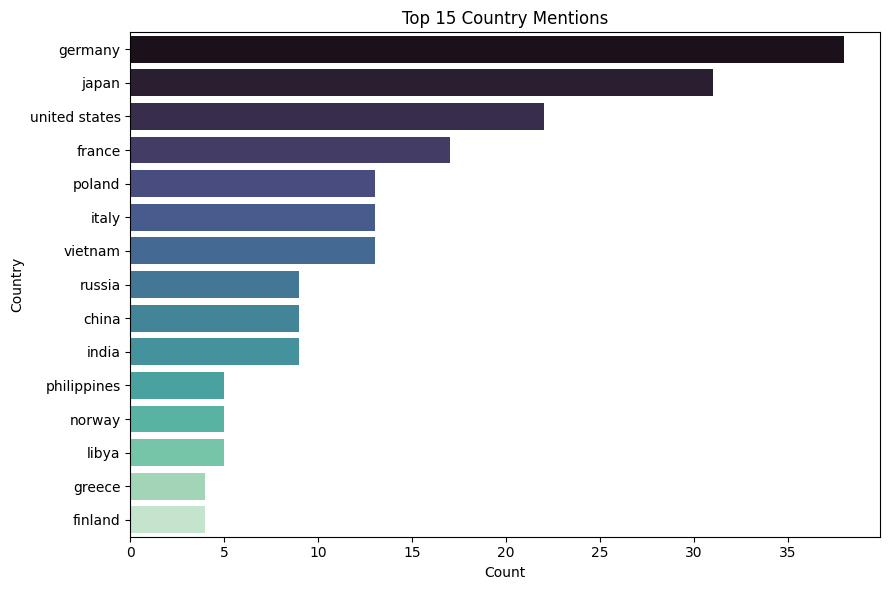

Chart saved: /Users/ianfleming/20th-century/top15_countries.png


In [73]:
# Plot & save the top 15
df_top15 = df_countries.head(15)
plot_show_and_save(
    df_top15,
    "Top 15 Country Mentions",
    "top15_countries.png",
    path,
    y_col="Country"
)



### Top 15 Country Mentions

The bar chart shows the countries most frequently mentioned in the 20th-century text dataset. Germany and Japan dominate the list, reflecting their central roles in 20th-century global events, particularly the World Wars and post-war developments. The United States, France, and Italy also appear prominently, indicating their significant geopolitical influence during the same period.
